# Heather's Notebook

In [1]:
import pandas as pd

## Work for trees dataset:

In [27]:
# load in the City of Pittsburgh Trees data file
tree_data = pd.read_csv("City of Pittsburgh Trees.csv", usecols=["id", "neighborhood", "height", "width", "stems"])

# look at the first 10 rows of data to ensure it was loaded correctly
tree_data.head(10)

,id,height,width,stems
neighborhood,,,,
Allegheny Center,867,865,865,867
Allegheny West,386,370,370,386
Allentown,84,66,66,84
Arlington,107,94,94,107
Arlington Heights,5,5,5,5
...,...,...,...,...
Upper Lawrenceville,373,332,332,373
West End,131,119,118,131
West Oakland,78,71,71,78


In [59]:
# finding neighborhoods with the most trees
tree_counts = tree_data["neighborhood"].value_counts().sort_values(ascending=False)
tree_counts.head(10)

Squirrel Hill South          5073
Highland Park                2941
Squirrel Hill North          2083
South Side Flats             1693
Shadyside                    1558
Bloomfield                   1436
East Liberty                 1366
Point Breeze                 1316
Perry North                  1007
Central Business District    1002
Name: neighborhood, dtype: int64

## Work for rent dataset:

In [33]:
# load in rent data file
rent_data = pd.read_csv("City of Pittsburgh Contract Rent.csv")

# look at the first 10 rows to ensure it loaded in correctly
rent_data.head(10)

,_id,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; With cash rent:,Margin of Error; With cash rent:,Estimate; With cash rent: - Less than $100,Margin of Error; With cash rent: - Less than $100,Estimate; With cash rent: - $100 to $149,...,"Estimate; With cash rent: - $1,000 to $1,249","Margin of Error; With cash rent: - $1,000 to $1,249","Estimate; With cash rent: - $1,250 to $1,499","Margin of Error; With cash rent: - $1,250 to $1,499","Estimate; With cash rent: - $1,500 to $1,999","Margin of Error; With cash rent: - $1,500 to $1,999","Estimate; With cash rent: - $2,000 or more","Margin of Error; With cash rent: - $2,000 or more",Estimate; No cash rent,Margin of Error; No cash rent
0,1,Allegheny Center,1,695.0,103.000000,688.0,103.000000,61.0,57.000000,6.0,...,103.0,50.000000,10.0,15.000000,14.0,15.000000,0.0,10.000000,7.0,10.000000
1,2,Allegheny West,2,73.0,33.000000,73.0,33.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,5.0,8.000000,0.0,10.000000,0.0,10.000000
2,3,Allentown,3,563.0,154.664152,512.0,136.194714,0.0,17.320508,0.0,...,36.0,42.426407,0.0,17.320508,0.0,17.320508,0.0,17.320508,51.0,77.304592
3,4,Arlington,4,216.0,70.469852,211.0,70.469852,0.0,17.320508,0.0,...,0.0,17.320508,6.0,16.763055,0.0,17.320508,0.0,17.320508,5.0,15.779734
4,5,Arlington Heights,5,170.0,69.000000,166.0,70.000000,0.0,10.000000,19.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,4.0,6.000000
5,6,Banksville,6,1022.0,221.104048,1015.0,221.104048,0.0,20.000000,0.0,...,45.0,43.416587,0.0,20.000000,0.0,20.000000,0.0,20.000000,7.0,22.271057
6,7,Bedford Dwellings,7,633.0,69.000000,630.0,68.000000,219.0,72.000000,48.0,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,3.0,8.000000
7,8,Beechview,8,1514.0,236.300656,1467.0,234.793526,0.0,31.622777,0.0,...,13.0,36.619667,0.0,31.622777,0.0,31.622777,0.0,31.622777,47.0,41.218928
8,9,Beltzhoover,9,326.0,113.556154,298.0,110.607414,0.0,20.000000,10.0,...,0.0,20.000000,39.0,62.449980,0.0,20.000000,0.0,20.000000,28.0,36.124784
9,10,Bloomfield,10,2990.0,221.682205,2935.0,220.914010,0.0,31.622777,7.0,...,225.0,83.000000,100.0,63.906181,122.0,61.733297,13.0,37.202150,55.0,38.884444


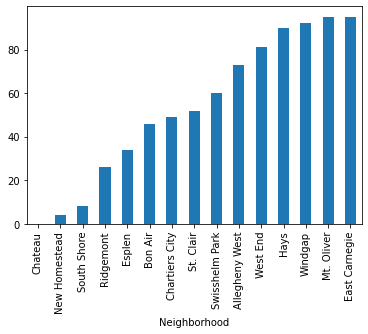

In [83]:
# focus on only neighborhood and estimated rent totals
focused_rent_data = rent_data.loc[:, ["Neighborhood", "Estimate; Total:"]]

# find the average estimated rent for each neighborhood
average_estimates = focused_rent_data.groupby("Neighborhood")["Estimate; Total:"].mean()

# sort neighborhoods from least expensive rent to most expensive
sorted_estimates = average_estimates.sort_values(ascending=True)

# plot the cheapest 15 neighborhoods
sorted_estimates.head(15).plot.bar()